![](https://upload.wikimedia.org/wikipedia/commons/9/96/Uniform_Distribution_PDF_SVG.svg)

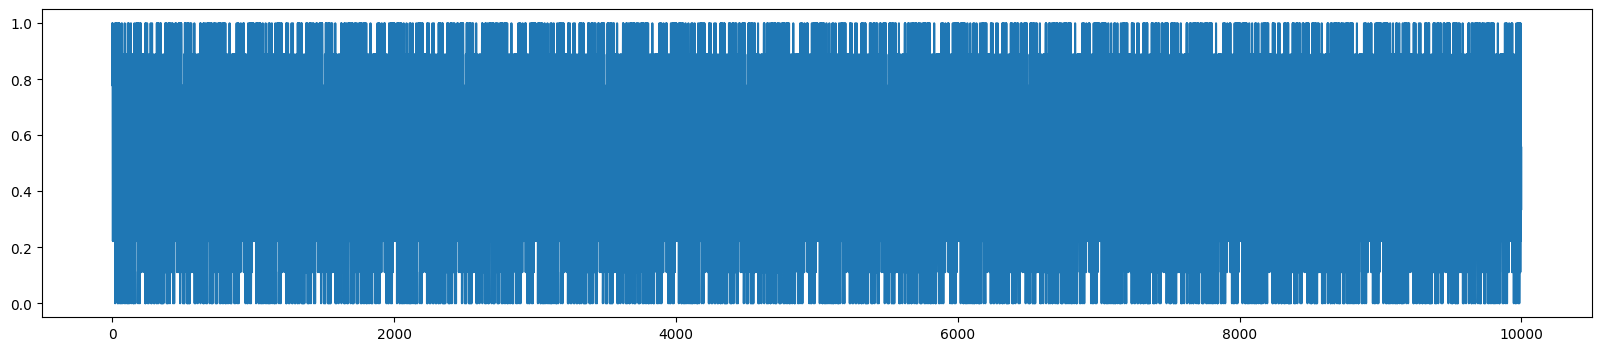

In [ ]:
# Importamos los módulos necesarios

import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy.ndimage.filters import uniform_filter1d

import datetime

# Store the first 1000 digits of pi
pi = (
    "14159265358979323846264338327950288419716939937510"
    "58209749445923078164062862089986280348253421170679"
    "82148086513282306647093844609550582231725359408128"
    "48111745028410270193852110555964462294895493038196"
    "44288109756659334461284756482337867831652712019091"
    "45648566923460348610454326648213393607260249141273"
    "72458700660631558817488152092096282925409171536436"
    "78925903600113305305488204665213841469519415116094"
    "33057270365759591953092186117381932611793105118548"
    "07446237996274956735188575272489122793818301194912"
    "98336733624406566430860213949463952247371907021798"
    "60943702770539217176293176752384674818467669405132"
    "00056812714526356082778577134275778960917363717872"
    "14684409012249534301465495853710507922796892589235"
    "42019956112129021960864034418159813629774771309960"
    "51870721134999999837297804995105973173281609631859"
    "50244594553469083026425223082533446850352619311881"
    "71010003137838752886587533208381420617177669147303"
    "59825349042875546873115956286388235378759375195778"
    "18577805321712268066130019278766111959092164201989"
)

# Use the first 100 digits for the random number sequence
#pi = pi[:100]
seed = int(str(dt.datetime.now().microsecond)[:3])
n = 10000  # size of the sequence
seed = 10
seq = [pi[seed]]  # seed is an index

for i in range(n-1):
    seed += 1
    if seed >= len(pi): seed = 0
    seq += [pi[seed]]


seq = np.array(seq).astype('int')
max_value = 9
seq = seq/max_value
plt.figure(figsize=(20,4))
plt.plot(seq)

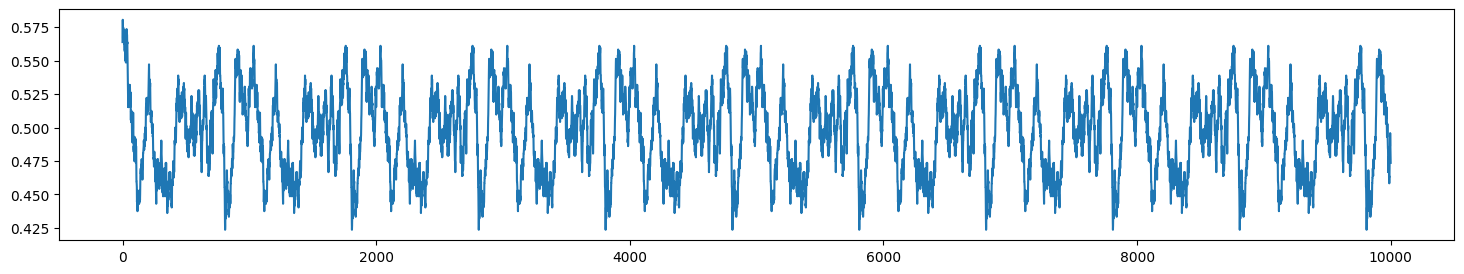

In [ ]:
plt.figure(figsize=(18,3))
avg_data = uniform_filter1d(seq, size=80)
plt.plot(avg_data)

In [ ]:
np.where(np.isclose(avg_data, avg_data.min())), avg_data.min()

((array([ 809, 1809, 2809, 3809, 4809, 5809, 6809, 7809, 8809, 9809]),),
 0.4236111111111128)

In [ ]:
np.isclose(0.1 + 0.1 + 0.1, 0.3)

True

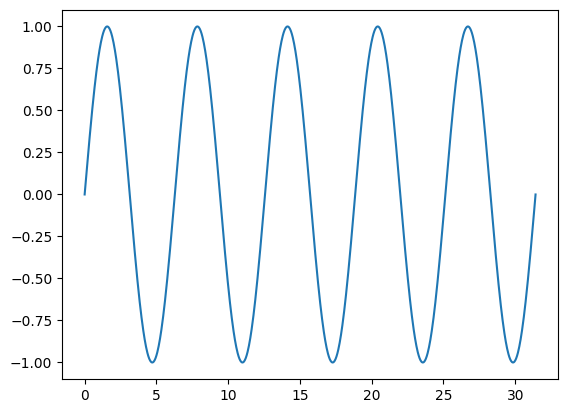

In [ ]:
x = np.linspace(0, 10*np.pi, 1000)
plt.plot(x, np.sin(x))

### Linear congruential generator

- Try to implement a linear congruential generator (LCG): 
  - See: https://drive.google.com/file/d/0B-dmEvN59Z2Zd3REcHJEdldicTQ/view

- LCG: $X_n = (a \cdot X_{n-1} + c) \text{ mod } m$

  - $a$: multiplier
  - $c$: increment
  - $m$: modulus
  - $X_0$: seed

**LCG Theorem:**

1. $m$ and $c$ are relatively prime
2. $a-1$ is divisible by every prime factor of $m$
3. If $m$ is a multiple of 4, then $a-1$ is a multiple of $4$.

In [ ]:
[(i, i%2) for i in range(1,11)]

[(1, 1),
 (2, 0),
 (3, 1),
 (4, 0),
 (5, 1),
 (6, 0),
 (7, 1),
 (8, 0),
 (9, 1),
 (10, 0)]

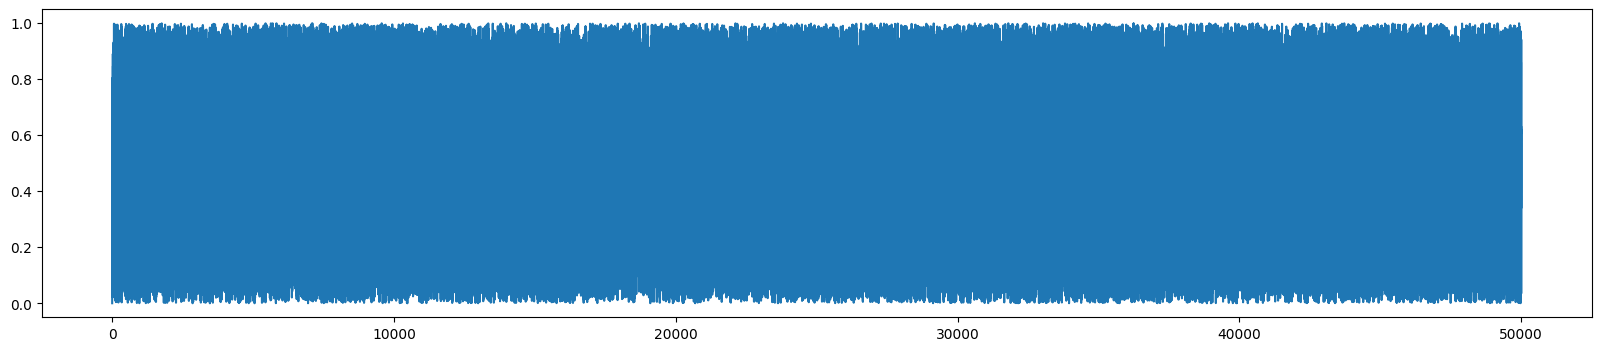

In [ ]:
m = 2**32; a = 1103515245; c = 12345

#m, c, a = 20, 13, 21

seed = dt.datetime.now().microsecond

n = 50000  # sequence size
X = [seed]
for i in range(n-1):
    X += [(a*X[-1] + c)%m]
X = np.array(X)/(m-1)
plt.figure(figsize=(20,4))
plt.plot(X)

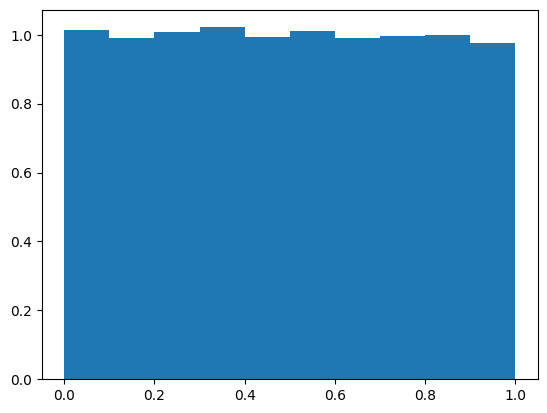

In [ ]:
plt.hist(X, density=True);

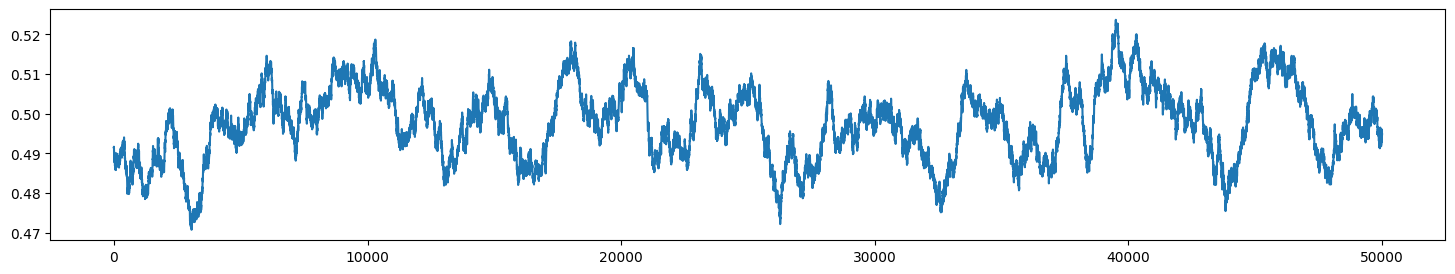

In [ ]:
plt.figure(figsize=(18,3))
avg_data = uniform_filter1d(X, size=1000)
plt.plot(avg_data)

### Pos sesión

- Que hay detrás de np.isclose(). Intenta implentarlo antes.
- Implementa o investiga suavizado de una serie (smoothing average).

- Implement the birhtday problem: https://en.wikipedia.org/wiki/Birthday_problem

In [ ]:
# code 
sims = 10000

reps = []
for si in range(sims):
    cumples = [int(np.random.random()*365) for i in range(16)]
    c, f = np.unique(cumples, return_counts=True)
    reps += [len(np.where(f > 1)[0])]
reps = np.array(reps)
len(np.where(reps)[0]) / sims

0.2866


- What is the probability of getting 5 heads out of 10 coin tosses?
- What is the probability of getting 50 heads out of 100 coin tosses?
  - **Same probability or not?**

In [ ]:
# code 
sims = 10000
m10 = [(np.random.random(size=10)*2).astype('int').sum() for i in range(sims)]
m100 = [(np.random.random(size=100)*2).astype('int').sum() for i in range(sims)]

In [ ]:
len(np.where(np.array(m10) == 5)[0]) / sims

0.2496

In [ ]:
len(np.where(np.array(m100) == 50)[0]) / sims

0.0819

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>